In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

---



12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed


In [105]:
# read data set
df = pd.read_csv('C:/Users/Rehme/data science practice/Data sets/3-Zomato Data Analysis/zomato.csv')
df.head(100)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://www.zomato.com/bangalore/vi-ras-bar-an...,"3828, Near Deve Gowda Petrol Bunk, 30th Cross,...",Vi Ra's Bar and Restaurant,No,No,3.3/5,62,+91 9845063930\r\n+91 7411148111,Banashankari,Bar,Chilli Chicken,"South Indian, North Indian, Chinese",800,[],[],Delivery,Banashankari
96,https://www.zomato.com/bangalore/kaggis-banash...,"50 Feet Road, Hanumanthanagar, Banashankari, B...",Kaggis,No,No,3.8/5,64,+91 9900191258\r\n080 26509710,Banashankari,Quick Bites,NaN,"Fast Food, Bakery",250,"[('Rated 4.0', ""RATED\n My favorite place sin...",[],Delivery,Banashankari
97,https://www.zomato.com/bangalore/ayda-persian-...,"34, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Ayda Persian Kitchen,No,No,3.7/5,39,080 42124293,Banashankari,Casual Dining,NaN,"North Indian, Iranian",950,"[('Rated 1.0', 'RATED\n The quality of foods ...",[],Delivery,Banashankari
98,https://www.zomato.com/bangalore/chatar-patar-...,"24/1, 23rd Cross, 6th Main Road, Opposite Kave...",Chatar Patar,No,No,3.7/5,65,+91 7619353103,Banashankari,Quick Bites,"Panipuri, Chaat, Noodles, Dahi Bhalle","Fast Food, Street Food",300,"[('Rated 4.0', ""RATED\n I've had food from Ch...",[],Delivery,Banashankari


In [106]:
df.shape

(51717, 17)

In [107]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [108]:
len(df['name'].unique())

8792

In [109]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Getting all NAN Features

In [110]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [111]:
feature_na =[feature for feature in df.columns if df[feature].isnull().sum()>0] # comprehension used

In [112]:
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [113]:
# percen of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100)))

rate has 15.0 % missing values
phone has 2.0 % missing values
location has 0.0 % missing values
rest_type has 0.0 % missing values
dish_liked has 54.0 % missing values
cuisines has 0.0 % missing values
approx_cost(for two people) has 1.0 % missing values


In [114]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [115]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [116]:
df.shape

(43942, 17)

In [117]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [118]:
def split(x):
    return x.split('/')[0]

In [119]:
df['rate']=df['rate'].apply(split)

In [120]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [121]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [122]:
df.replace('NEW',0,inplace=True)

In [123]:
df.replace('-',0,inplace=True)

In [124]:
df['rate']=df['rate'].astype(float)

In [125]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

# calculate average rating of each resturant

<AxesSubplot:xlabel='name'>

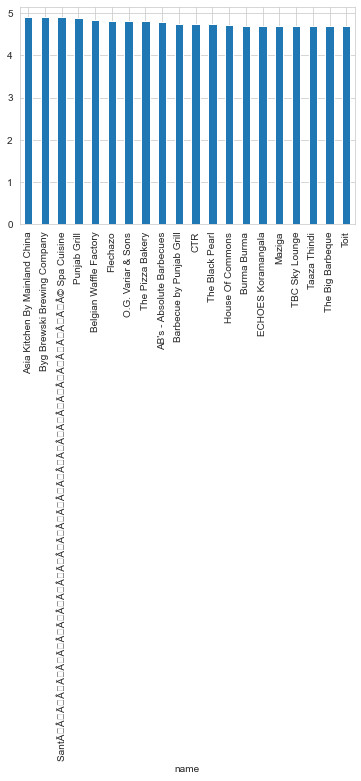

In [126]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [127]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['resturant','rating']
df_rate.head(20)

,resturant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


In [128]:
df_rate.shape

(7162, 2)

# Rating distribution

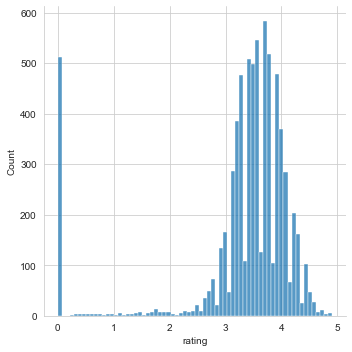

In [129]:
sns.set_style(style='whitegrid')
sns.displot(df_rate['rating'])

### Almost more than 50 percent of resturants has rating between 3 and 4. Resturants having more than 4.5 are very rare.

# Top Restaurant chain in Bangalore 

Text(0.5, 0, 'Number of outlets')

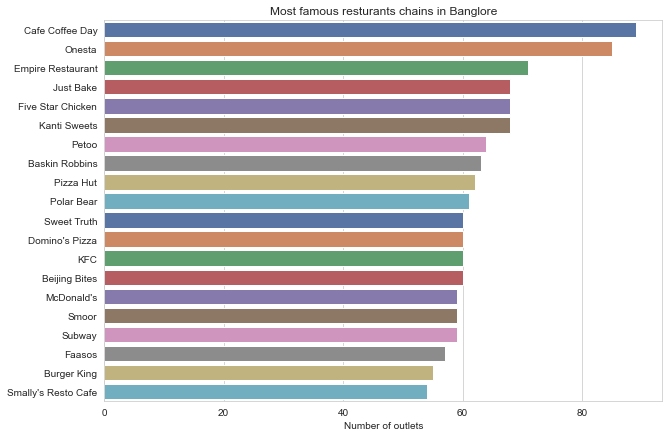

In [130]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famous resturants chains in Banglore')
plt.xlabel('Number of outlets')

# Resturants which do not accept online orders

([<matplotlib.patches.Wedge at 0x1a3e8b4cc70>,
 [Text(-0.481488774517003, 0.9890240442042423, ''),
  Text(0.5252605823084886, -1.0789352717716423, '')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.30640200634661835, -0.629378908533458, '35.6%')])

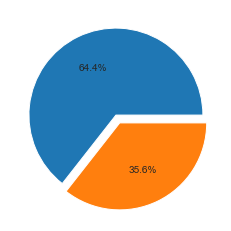

In [131]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

### using plotly, How many of the restuarants do not accept online orders?

In [132]:
!pip install plotly

In [133]:
import plotly.express as px

In [134]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
fig = px.pie(df,values=x,names=labels,title='pie chart')
fig.show()

### Ratio between resturants which provide table and not provide table booking

([<matplotlib.patches.Wedge at 0x1a3e8bc8310>,
 [Text(-0.9856961240827233, 0.4882654513359477, ''),
  Text(1.0753048626356982, -0.5326532196392153, '')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.6%')])

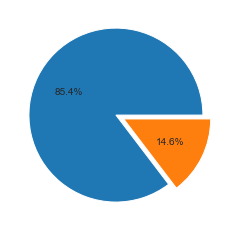

In [135]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

### using plotly

In [136]:
x=df['book_table'].value_counts()
labels=['not book','book']
fig = px.pie(df,values=x,names=labels,title='pie chart')
fig.show()

In [137]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [138]:
x=df['book_table'].value_counts()
labels=['not book','book']

In [139]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [140]:
iplot([trace])

# Types of resturants have 

In [141]:
df['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51709     Casual Dining, Bar
51711     Casual Dining, Bar
51712                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 43942, dtype: object

In [142]:
df['rest_type'].isna().sum()

151

In [143]:
df['rest_type'].dropna(inplace=True)

In [144]:
df['rest_type'].isna().sum()

151

In [145]:
len(df['rest_type'].unique())

88

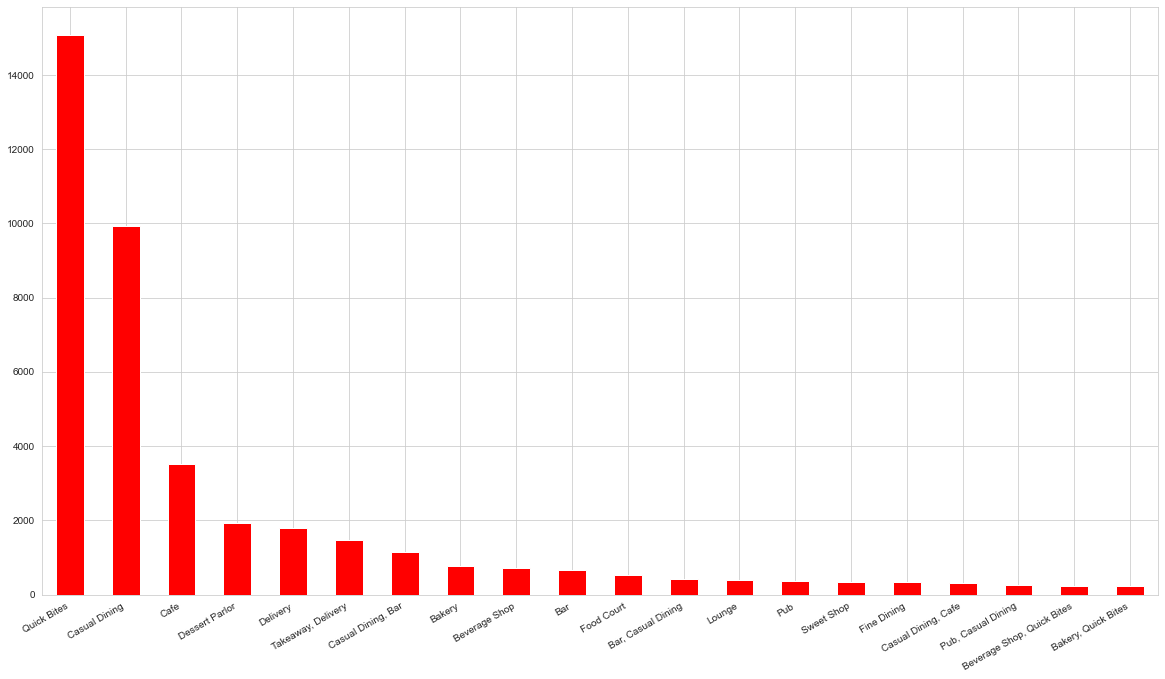

In [146]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

In [147]:
# using plotly

In [148]:
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')

In [149]:
iplot([trace1])

#### At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.We can observe tha Quick Bites type restaurants dominates.


# Highest voted resturant

<AxesSubplot:xlabel='name'>

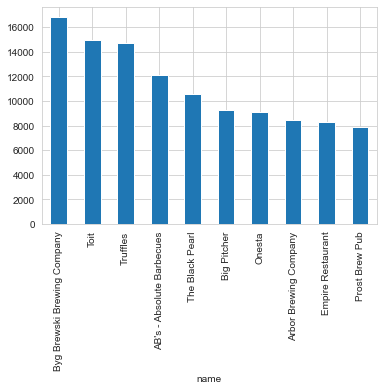

In [150]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()

# using plotly to provide interactive graphs

In [151]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')

In [152]:
iplot([trace1])

#  Total restaurants at different locations of Bangalore

In [153]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [154]:
restaurant = []
location = []
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [155]:
df_total = pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


<AxesSubplot:xlabel='location'>

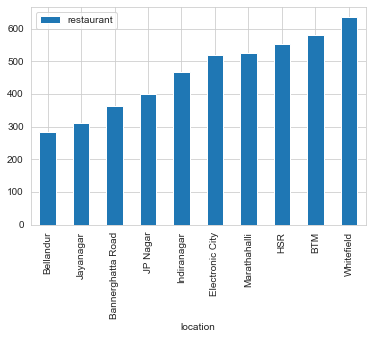

In [156]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

In [157]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [158]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [159]:
iplot([trace1])

In [160]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Different type of restaurants

In [161]:
# data is represented in form of percentage
df['rest_type'].value_counts()/len(df)*100

Quick Bites                   34.302035
Casual Dining                 22.582040
Cafe                           8.026489
Dessert Parlor                 4.412635
Delivery                       4.075827
                                ...    
Bakery, Food Court             0.004551
Food Court, Beverage Shop      0.004551
Dessert Parlor, Food Court     0.004551
Dessert Parlor, Kiosk          0.004551
Quick Bites, Kiosk             0.002276
Name: rest_type, Length: 87, dtype: float64

# Total number of variety of restaurants i.e north indian,south indian....

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

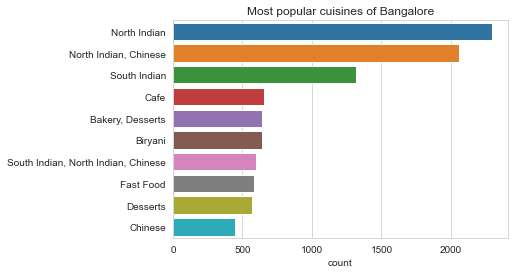

In [162]:
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('count')
plt.title('Most popular cuisines of Bangalore')


### using plotly

In [163]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar(
         x = cuisines.index,
         y = cuisines,
         name = 'cuisines')

In [164]:
iplot([trace1])

### we can observe that North indian,chinese,South indian and Biryani are most common.it means Banglore is more influenced by North Indian culture more than south






# Analyse approx cost for 2 people 

In [165]:
len(df['approx_cost(for two people)'].value_counts())

66

In [166]:
df['approx_cost(for two people)'].isna().sum()

252

In [167]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [168]:
df['approx_cost(for two people)'].isna().sum()

0

In [169]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [170]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [171]:
df[~df['approx_cost(for two people)'].apply(is_float)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
67,https://www.zomato.com/gustoesbeerhouse?contex...,"10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...",Gustoes Beer House,No,No,4.1,868,080 49653521,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...","1,200","[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari
119,https://www.zomato.com/bangalore/k27-the-pub-b...,"27, 27th Cross, 2nd Stage, Banashankari, Banga...",K27 - The Pub,No,No,3.1,30,+91 9980097472,Banashankari,Bar,NaN,"Chinese, North Indian","1,000","[('Rated 4.0', ""RATED\n Convenient and Averag...",[],Delivery,Banashankari
166,https://www.zomato.com/bangalore/patio-805-jay...,"805, Ground Floor, 35C Cross, 9th Main, 4th Bl...",Patio 805,Yes,Yes,4.1,364,+91 8884999805,Jayanagar,Casual Dining,"Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...","Thai, Vietnamese, Asian, Chinese","1,200","[('Rated 4.0', ""RATED\n The number of good re...",[],Delivery,Banashankari
207,https://www.zomato.com/bangalore/chutney-chang...,"Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...",Chutney Chang,Yes,Yes,4.1,2339,080 22443007\r\n+91 9901967373,Jayanagar,Casual Dining,"Veg Momos, Brownie Chocolate, Palak Chaat, Mut...","North Indian, Chinese, BBQ","1,500","[('Rated 4.0', 'RATED\n Great place for team ...",[],Delivery,Banashankari
217,https://www.zomato.com/bangalore/toscano-jayan...,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",Toscano,Yes,Yes,4.3,1129,080 41558423\r\n+91 7619320074,Jayanagar,Casual Dining,"Pizza, Pasta, Salads, Calamari, Ravioli, Pumpk...","Italian, Salad","1,300","[('Rated 4.0', 'RATED\n Saturday Night Dinner...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [172]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [173]:
df['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [174]:
type(df['approx_cost(for two people)'][0])

str

In [175]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [176]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

# Approx cost for 2 people vs rating

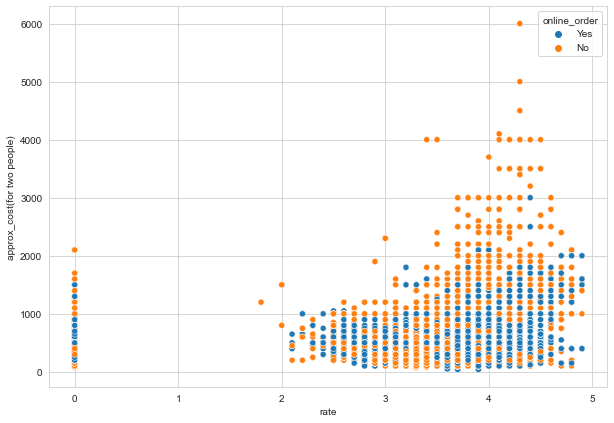

In [177]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='rate',y="approx_cost(for two people)",hue='online_order',data=df)
plt.show()

### from this scatterplot,we can come up with a conclusion that most of the highest rated accepts online and theuy r budgetes too

In [178]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Is there any difference between votes of restaurants accepting and not accepting online orders

<AxesSubplot:xlabel='online_order', ylabel='votes'>

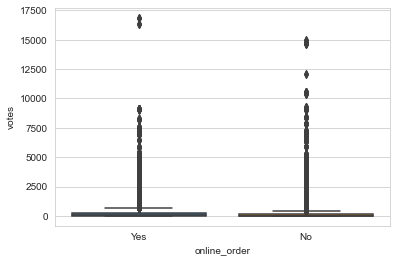

In [179]:
sns.boxplot(x='online_order',y='votes',data=df)

### from this boxplot,we can observe that median number of votes for both categories vary.

### Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application


### Is there any difference between price of restaurants accepting and not accepting online orders

<AxesSubplot:xlabel='online_order', ylabel='approx_cost(for two people)'>

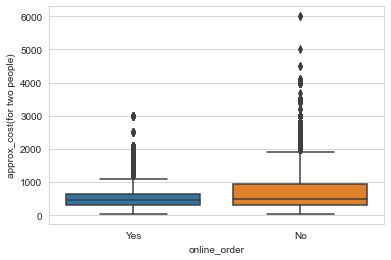

In [180]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

In [181]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

### Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders

# Cheapest Rate for 2 people

In [182]:
df['approx_cost(for two people)'].min()

40

# Most costly for 2 people

In [183]:
df['approx_cost(for two people)'].max()

6000

In [184]:
df[df['approx_cost(for two people)']==6000]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
19139,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,080 30571234\r\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
45618,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,080 30571234\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road


In [185]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

#### distribution of cost for 2 people

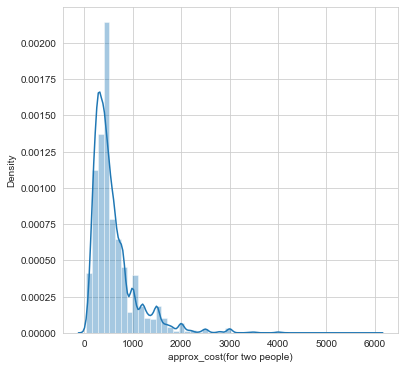

In [186]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

In [187]:
px.histogram(df, x="approx_cost(for two people)")

### most of the price lie betweeen in arange of under 1000,it means most are affordable and very few are luxurious

# Most costly rate for 2 people is served at which restaurant what exactly is the dish involved in this and liked dish of that restaurant

In [188]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [189]:
data=df.copy()

In [190]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int32
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [191]:
data.set_index('name',inplace=True)

## Top 10 most expensive restaurant with approx for 2 people

<AxesSubplot:xlabel='name'>

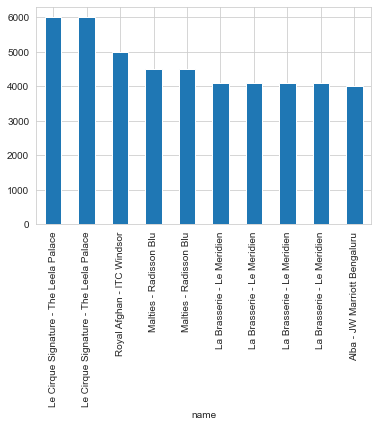

In [192]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

In [193]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nlargest(10).index,
        y = data['approx_cost(for two people)'].nlargest(10),
        name= 'Priority')
iplot([trace1])

# Top 10 cheapest restaurant with approx cost for 2 people

<AxesSubplot:xlabel='name'>

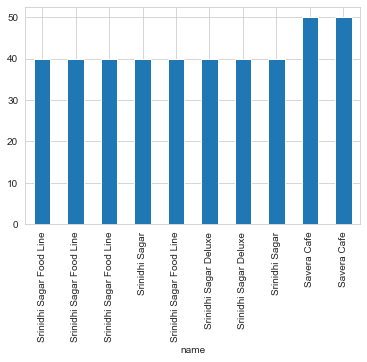

In [194]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

In [195]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nsmallest(10).index,
        y = data['approx_cost(for two people)'].nsmallest(10),
        name= 'Priority')
iplot([trace1])

### Top 10 cheapest restaurant location wise with approx cost for 2 people

In [196]:
data.set_index('location',inplace=True)
data['approx_cost(for two people)'].nsmallest(10)

location
Indiranagar         40
Indiranagar         40
Indiranagar         40
Old Airport Road    40
Indiranagar         40
Domlur              40
Domlur              40
Old Airport Road    40
Shivajinagar        50
Shivajinagar        50
Name: approx_cost(for two people), dtype: int32

### all restaurant that are below than 500(budget hotel)

In [197]:
data[data['approx_cost(for two people)']<=500]

,url,address,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,
Banashankari,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brookefield,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
KR Puram,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
Brookefield,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [198]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()""

SyntaxError: invalid syntax (843528779.py, line 3)

In [ ]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()